# **Prediction of house prices with regressions**

## Introduction

The aim of this Notebook is to use AI TRAINING product to train a simple model, on the Boston housing dataset, with the PyTorch library. It is an exemple of neural network for regression between data.

## Code

The neural network will be set up in different step. First, librairies have to be imported. Next, the dataset will be loaded, the confusion matrix printed and boss explained.
After having split the dataset, the neural network model will be defined and trained. Finally, the R squared score will be printed and the loss displayed.

### Step 1 - librairies importation (and intallation if required)

In [ ]:
pip install pandas sklearn matplotlib seaborn numpy

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd

import seaborn as sns
import numpy as np

### Step 2 - Load and explain the dataset

In [3]:
# data opening
open_dataset = pd.read_csv("/workspace/data_boston_house_prices/Boston.csv")
dataset = open_dataset.drop(open_dataset.columns[[0]],axis=1)

The Boston dataset has 506 rows and 15 columns.

This data frame contains the following columns:


- unnamed column: corresponding to index. It is deleted.

**INPUTS**

- crim: per capita crime rate by town.

- zn: proportion of residential land zoned for lots over 25,000 sq.ft.

- indus: proportion of non-retail business acres per town.

- chas: Charles River dummy variable (= 1 if tract bounds river ; 0 otherwise).

- nox: nitrogen oxides concentration (parts per 10 million).

- rm: average number of rooms per dwelling.

- age: proportion of owner-occupied units built prior to 1940.

- dis: weighted mean of distances to five Boston employment centres.

- rad: index of accessibility to radial highways.

- tax: full-value property-tax rate per \$10.000.

- ptratio: pupil-teacher ratio by town.

- black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

- lstat: lower status of the population (percent).

**OUTPUT**

- medv: median value of owner-occupied homes in \$1000s.

### Step 3 - Display the confusion matrix

If you have a data set with many columns, a good way to check correlations among columns is by visualizing the correlation matrix.

The orange colour means positive and purple one means negative. The stronger the color, the larger the correlation magnitude. 

- First, check what is the strongest correletion with medv (the output), except the main diagonal

- Next, verify what are the four other variables most correlated with medv

[]

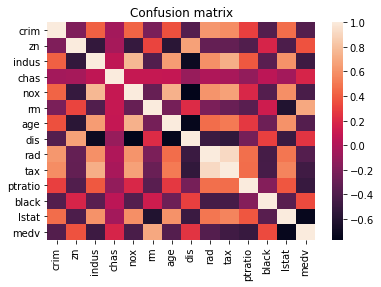

In [4]:
# confusion matrix
correlation = dataset.corr()
fig = sns.heatmap(correlation)
fig.set_title('Confusion matrix')
fig.plot()

Parameters which are the most corralated with **medv** :
- rm: 0.8
- lstat : - 0.8
- tax: 0.5
- indus: - 0.5
- ptratio: - 0.5

### Step 4 - Split the dataset

In [5]:
# input of the neural network
X = dataset.drop(['medv'],axis=1).values

# output of the neural network (only the price of houses)
y = dataset.iloc[:, 13].values

# train and test split : 20 % for the test and 80 % for the learning
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

# convert split data from numpy array to Pytorch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

### Step 5 - Train model

In [20]:
# defining the neural network model
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        # fully connected layer : 13 input features for 13 parameters in X
        self.layer1 = nn.Linear(in_features=13, out_features=50)
        # fully connected layer
        self.layer2 = nn.Linear(in_features=50, out_features=50)
        # output layer : 1 output features for 1 species
        self.output = nn.Linear(in_features=50, out_features=1)
     
    def forward(self, x):
        # activation fonction : reLU
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.output(x)
        return x
    
# display the model architecture
model = Model()
print(model)

# measure loss (for regression mean squared loss)
criterion = nn.MSELoss()
# optimizer Adam with a learning rate of 0.05
optimizer = torch.optim.Adam(model.parameters(), lr=0.05)

epoch_list = []
loss_list = []
# the model will be train during 600 epochs
epochs = 600
for i in range(epochs):
    optimizer.zero_grad()
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    loss_list.append(loss)
    loss.backward()
    epoch_list.append(i)
    optimizer.step()
    if i > 0 and i % 10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

# print the last loss
last_loss = loss_list[599]
print('Last value of loss: ',last_loss.item())


Model(
  (layer1): Linear(in_features=13, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (output): Linear(in_features=50, out_features=1, bias=True)
)
Epoch: 10 Loss: 153.4332733154297
Epoch: 20 Loss: 173.8829345703125
Epoch: 30 Loss: 115.03936767578125
Epoch: 40 Loss: 99.13554382324219
Epoch: 50 Loss: 94.4698486328125
Epoch: 60 Loss: 92.4862060546875
Epoch: 70 Loss: 91.38339233398438
Epoch: 80 Loss: 90.6115493774414
Epoch: 90 Loss: 89.91624450683594
Epoch: 100 Loss: 89.27413940429688
Epoch: 110 Loss: 88.66644287109375
Epoch: 120 Loss: 88.09204864501953
Epoch: 130 Loss: 87.55540466308594
Epoch: 140 Loss: 87.16007232666016
Epoch: 150 Loss: 87.4166488647461
Epoch: 160 Loss: 86.48225402832031
Epoch: 170 Loss: 86.09770202636719
Epoch: 180 Loss: 85.8694839477539
Epoch: 190 Loss: 85.69709777832031
Epoch: 200 Loss: 85.5351791381836
Epoch: 210 Loss: 85.42012786865234
Epoch: 220 Loss: 85.90708923339844
Epoch: 230 Loss: 85.27674102783203
Epoch: 240 L

### Step 6 - Print the R squared score (R²)

The Pearson linear coefficient of determination, noted R², is a measure of the quality of the prediction of a linear regression. The closer it is to 1, the better.

In [15]:
# calculate the R2 score (Pearson's linear coefficient of determination)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('R2 score for the train: ',lm.score(X_train,y_train))
print('R2 score for the test: ',lm.score(X_test,y_test))

R2 score for the train:  0.7730135563179157
R2 score for the test:  0.5892231411019891


### Step 7 - Loss display

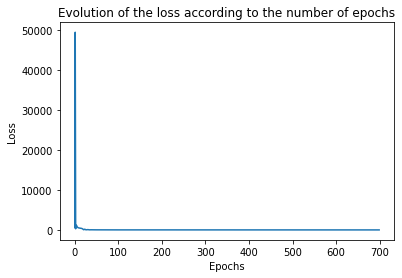

In [16]:
# display the graph of loss
plt.plot(epoch_list,loss_list)
plt.title("Evolution of the loss according to the number of epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

## Conclusion

- The loss of this neural network is quite low (arround 17 %).
- The R² score is not bad but it could be better than 77 %. 

To conclude, this neural network could be better if we take more input parameters. We can also increse the number of epoch with care of overfitting.